# IMPORT

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 29.9 MB/s 


In [ ]:
import os
import pandas as pd 
import numpy as np
from sklearn import preprocessing,svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, mean_absolute_error, mean_squared_error,f1_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from itertools import product, combinations
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.feature_selection import mutual_info_classif,SelectFromModel
from sklearn.decomposition import PCA
import itertools
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import cvxopt
import matplotlib.mlab as mlab
import seaborn
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif,SelectFromModel
from sklearn.svm import LinearSVC
from itertools import combinations
from sklearn.decomposition import PCA
import time
import shap

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA CREATION

In [ ]:
aug_local_b = '/content/drive/MyDrive/Capstone/Data Augmentation/Local Binary features -  UCLA Aug'
aug_local_w = '/content/drive/MyDrive/Capstone/Data Augmentation/Local Weighted features - UCLA Aug'

local_b = '/content/drive/MyDrive/Capstone/Graph properties /Binary local feature files'
local_w = '/content/drive/MyDrive/Capstone/Graph properties /Weighted local feature files'

In [ ]:
dirs = [local_w, aug_local_w]

In [ ]:
df_new = pd.DataFrame()

In [ ]:
temp = list()

In [ ]:
# for directory in dirs:
#     for file in os.listdir(directory):
#         if(file.endswith(".csv") and '(' not in file):
#             df = pd.read_csv(directory + '/' + file)
#             df = df.fillna(0)
#             df.drop(['Unnamed: 0'], axis = 1, inplace = True, errors='ignore')
            
#             if directory == local_b or directory == aug_local_b:
#               subject = file[21:26]
#             elif directory == local_w or directory == aug_local_w:
#               subject = file[23:28]

#             if subject[-1] == '.':
#                 subject = subject[:-1]
#             temp.append(int(subject))
#             for col in df:
#               for roi in range(0,164):
#                 df_new.at[int(subject), str(roi)+'_'+col] = df[col][roi]

In [ ]:
# df_new.to_csv('local_binary_flattened.csv')

In [ ]:
# Labels
combined_phenotype='/content/drive/MyDrive/Capstone/COMBINED DATA/phenotypic_data.csv'

labels_mappings= pd.read_csv(combined_phenotype)
labels_mappings

Subject  Label
0      40013      0
1      40014      0
2      40017      0
3      40018      0
4      40019      0
..       ...    ...
759     4167      0
760     4168      0
761     4169      1
762     4170      1
763     4171      1

[764 rows x 2 columns]

In [ ]:
local_binary_flattened= '/content/drive/MyDrive/Capstone/Biomarker Detection/local_binary_flattened.csv'
local_weighted_flattened= '/content/drive/MyDrive/Capstone/Biomarker Detection/local_weighted_flattened.csv'

In [ ]:
df1=pd.read_csv(local_binary_flattened)
df2=pd.read_csv (local_weighted_flattened)

In [ ]:
df= df1.merge(df2, how='inner', on='Subject')

In [ ]:
subs= list(set(labels_mappings['Subject'].tolist()))

In [ ]:
for sub in subs:
    if(int(sub)<2000):
        continue
    r = df.index[df.Subject == sub]
    mask = labels_mappings['Subject'] == sub
    df.at[r, 'Schizophrenic'] = labels_mappings[mask]['Label'].values[0]

In [ ]:
#take care of subject 3127
r = df.index[df.Subject == 3127]
df=df.drop(r)

# MODEL

In [ ]:
df_original= df[(df['Subject'] < 3000) | (df['Subject'] > 4000)]
# df_original= df[(df['Subject'] < 3000)]

In [ ]:
df_original.fillna(0, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_original.to_csv('merged features.csv')

In [ ]:
X = df_original.drop(['Schizophrenic'], axis=1)
X = X.drop(['Subject'], axis=1)
y = df_original['Schizophrenic']

In [ ]:
pipe = Pipeline([('standardscaler',StandardScaler()),('norm',Normalizer())])
X_new = pipe.fit_transform(X)

RS for AB: <br>
1,10,18,62, 72

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=62)

In [ ]:
clf1 = DecisionTreeClassifier(criterion="entropy")
clf2 = KNeighborsClassifier(n_neighbors=3 )
clf3 = SVC(kernel="poly", degree=4)
clf4=LogisticRegression()
clf5=RandomForestClassifier(n_estimators=300, criterion="entropy", max_features="log2")
clf6=GradientBoostingClassifier(n_estimators = 300, max_features="log2", max_depth=7)
clf7=AdaBoostClassifier(n_estimators=300)

In [ ]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)
clf7.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=300)

In [ ]:
pred = clf2.predict(X_test)
print("KNN accuracy:", accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print("f1 score: ", f1_score(y_test, pred))

KNN accuracy: 60.9375
[[27 16]
 [ 9 12]]
f1 score:  0.48979591836734687


In [ ]:
pred = clf3.predict(X_test)
print("SVM accuracy:", accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print("f1 score: ", f1_score(y_test, pred))

SVM accuracy: 68.75
[[43  0]
 [20  1]]
f1 score:  0.0909090909090909


In [ ]:
pred = clf4.predict(X_test)
print("Logistic Regression accuracy:", accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print("f1 score: ", f1_score(y_test, pred))

Logistic Regression accuracy: 73.4375
[[42  1]
 [16  5]]
f1 score:  0.37037037037037035


In [ ]:
pred = clf1.predict(X_test)
print("Decision tree accuracy:", accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print("f1 score: ", f1_score(y_test, pred))

Decision tree accuracy: 67.1875
[[32 11]
 [10 11]]
f1 score:  0.5116279069767442


In [ ]:
pred = clf5.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print("f1 score: ", f1_score(y_test, pred))

Random Forest accuracy: 68.75
[[39  4]
 [16  5]]
f1 score:  0.33333333333333326


In [ ]:
pred = clf6.predict(X_test)
print("XGBoost :", accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print("f1 score: ", f1_score(y_test, pred))

XGBoost : 68.75
[[39  4]
 [16  5]]
f1 score:  0.33333333333333326


In [ ]:
pred = clf7.predict(X_test)
print("AdaBoost :", accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print("f1 score: ", f1_score(y_test, pred))

AdaBoost : 75.0
[[36  7]
 [ 9 12]]
f1 score:  0.6


## Feature Selection

For random forest

In [ ]:
df_tmp = pd.DataFrame(X_test)

In [ ]:
masker = shap.maskers.Independent(df_tmp, max_samples=1000)
explainer = shap.TreeExplainer(clf1, masker)

In [ ]:
shap_values = explainer(df_tmp.sample(25, random_state=17))

In [ ]:
tmp = shap.Explanation(shap_values[:, :, 1], data=df_tmp, feature_names=X.columns)

In [ ]:
shap.initjs()
shap.plots.force(tmp)

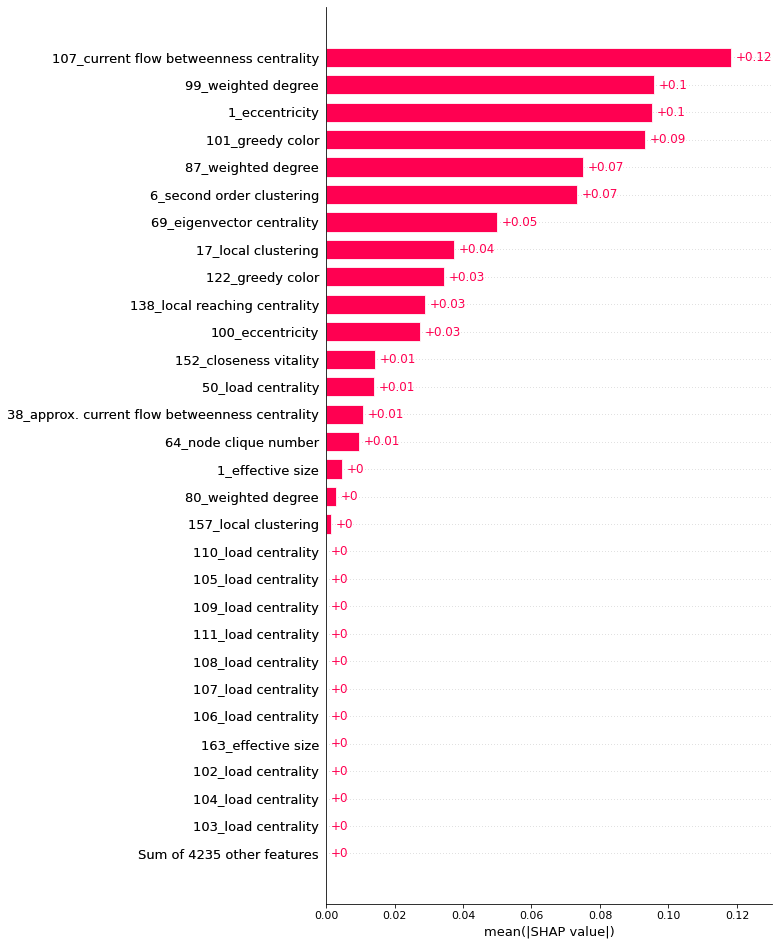

In [ ]:
shap.plots.bar(tmp, max_display=30)

Univariate FS -> feature importances

In [ ]:
plt.figure(figsize=(15,300))
importances = mutual_info_classif(X,y)
feat_importances = pd.Series (importances, df.columns[0:len(df.columns)-2])

<Figure size 1080x21600 with 0 Axes>

In [ ]:
feat_importances.sort_values(ascending=False, inplace=True) 

In [ ]:
feat_importances.to_frame().head(30)

0
156_current flow betweenness centrality  0.146114
110_number of cliques                    0.136544
128_pagerank centrality                  0.132224
144_second order clustering              0.127849
131_second order clustering              0.125525
103_effective size                       0.120935
58_second order clustering               0.120855
136_square clustering                    0.115326
142_avg neighbour degree                 0.115126
54_local reaching centrality             0.114694
114_weighted degree                      0.111902
72_local reaching centrality             0.111630
80_pagerank centrality                   0.110117
83_pagerank centrality                   0.108471
70_harmonic centrality                   0.107565
68_local reaching centrality             0.105471
143_betweenness centrality               0.104801
28_avg neighbour degree                  0.104428
70_local reaching centrality             0.102999
109_current flow betweenness centrality  0.102150
53_local reaching centrality             0.102132
44_harmonic centrality                   0.101751
9_betweenness centrality                 0.100488
126_square clustering                    0.099941
17_pagerank centrality                   0.099843
153_degree                               0.099822
68_harmonic centrality                   0.099623
70_closeness centrality                  0.099171
58_local clustering                      0.098976
68_local clustering                      0.098830

Feature selection for Adaboost

In [ ]:
import sys
import joblib
from sklearn.datasets import make_classification
from matplotlib import pyplot
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [ ]:
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
importance = clf7.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	if(v>0.005):
		print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 306, Score: 0.01000
Feature: 345, Score: 0.00667
Feature: 373, Score: 0.00667
Feature: 432, Score: 0.00667
Feature: 446, Score: 0.00667
Feature: 615, Score: 0.00667
Feature: 718, Score: 0.00667
Feature: 831, Score: 0.00667
Feature: 862, Score: 0.00667
Feature: 957, Score: 0.00667
Feature: 983, Score: 0.00667
Feature: 1045, Score: 0.00667
Feature: 1462, Score: 0.00667
Feature: 1707, Score: 0.00667
Feature: 2107, Score: 0.01000
Feature: 2189, Score: 0.00667
Feature: 2224, Score: 0.00667
Feature: 2286, Score: 0.00667
Feature: 2448, Score: 0.00667
Feature: 2471, Score: 0.00667
Feature: 2474, Score: 0.00667
Feature: 2492, Score: 0.01000
Feature: 2544, Score: 0.02000
Feature: 2562, Score: 0.01000
Feature: 2567, Score: 0.00667
Feature: 2630, Score: 0.00667
Feature: 2666, Score: 0.01000
Feature: 3095, Score: 0.00667
Feature: 3234, Score: 0.01000
Feature: 3241, Score: 0.00667
Feature: 3298, Score: 0.00667
Feature: 3329, Score: 0.01000
Feature: 3373, Score: 0.00667
Feature: 3379, Score:

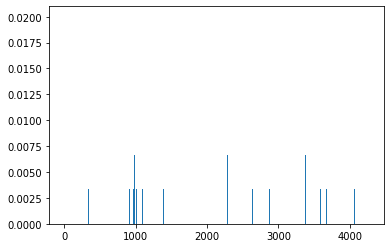

In [ ]:
# # plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

feature selection using permutation importance. Giving right results but picking only 10 features just wanted to verify with you if the X and y i have taken is correct or should i do it differently

In [ ]:
# results = permutation_importance(clf7, X_train, y_train, scoring='accuracy')
# # get importance
# importance = results.importances_mean
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()